# EXAMEN 1 MOD2 REGRESIÓN LINEAL

## Importar

In [1]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [2]:
## Conocer encoding de csv
liga = '/home/ef/Documents/Diplomado/EXAMEN02/'
import chardet
with open(liga + 'train_PAY_AMT1.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
df = pd.read_csv(liga + 'train_PAY_AMT1.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
df.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4804,8311,50000.0,2,2,1,36,0,0,0,0,0,16906.0,17645.0,18478.0,10279.0,10646.0,10776.0,1314.0,1147.0,348.0,512.0,435.0,190.0
5361,7014,210000.0,2,1,2,43,-1,0,0,0,0,-3309.0,177952.0,167125.0,139784.0,142662.0,145725.0,184212.0,5482.0,3493.0,3590.0,3815.0,3876.0
3671,16975,250000.0,2,1,2,33,-1,-2,-1,0,0,16317.0,0.0,0.0,188841.0,194321.0,198156.0,0.0,0.0,188841.0,8500.0,8000.0,7080.0
643,25362,150000.0,2,2,2,23,0,0,0,0,0,167317.0,166596.0,165990.0,161285.0,156749.0,151863.0,10000.0,10000.0,6000.0,6000.0,5500.0,5500.0


In [4]:
dim_antes = len(df)
df = df.iloc[:,1:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   SEX        5625 non-null   int64  
 2   EDUCATION  5625 non-null   int64  
 3   MARRIAGE   5625 non-null   int64  
 4   AGE        5625 non-null   int64  
 5   PAY_2      5625 non-null   int64  
 6   PAY_3      5625 non-null   int64  
 7   PAY_4      5625 non-null   int64  
 8   PAY_5      5625 non-null   int64  
 9   PAY_6      5625 non-null   int64  
 10  BILL_AMT1  5625 non-null   float64
 11  BILL_AMT2  5625 non-null   float64
 12  BILL_AMT3  5625 non-null   float64
 13  BILL_AMT4  5625 non-null   float64
 14  BILL_AMT5  5625 non-null   float64
 15  BILL_AMT6  5625 non-null   float64
 16  PAY_AMT1   5625 non-null   float64
 17  PAY_AMT2   5625 non-null   float64
 18  PAY_AMT3   5625 non-null   float64
 19  PAY_AMT4   5625 non-null   float64
 20  PAY_AMT5

In [5]:
cat = list(df.columns[1:10])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_2      5625 non-null   object
 4   PAY_3      5625 non-null   object
 5   PAY_4      5625 non-null   object
 6   PAY_5      5625 non-null   object
 7   PAY_6      5625 non-null   object
dtypes: object(8)
memory usage: 351.7+ KB


In [6]:
num = [col for col in df.columns if col not in cat]
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   AGE        5625 non-null   int64  
 2   BILL_AMT1  5625 non-null   float64
 3   BILL_AMT2  5625 non-null   float64
 4   BILL_AMT3  5625 non-null   float64
 5   BILL_AMT4  5625 non-null   float64
 6   BILL_AMT5  5625 non-null   float64
 7   BILL_AMT6  5625 non-null   float64
 8   PAY_AMT1   5625 non-null   float64
 9   PAY_AMT2   5625 non-null   float64
 10  PAY_AMT3   5625 non-null   float64
 11  PAY_AMT4   5625 non-null   float64
 12  PAY_AMT5   5625 non-null   float64
 13  PAY_AMT6   5625 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 615.4 KB


In [7]:
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

## Análisis exploratorio

### Categóricas

In [8]:
## Reemplazar por NaN
dict_replace = {'0':np.nan,
                '6':'5'}
df['EDUCATION'] = df['EDUCATION'].replace(dict_replace).copy()

df['MARRIAGE'] = df['MARRIAGE'].replace(dict_replace).copy()

df[cat].isnull().sum() / len(df)

SEX          0.000000
EDUCATION    0.000533
MARRIAGE     0.001956
PAY_2        0.000000
PAY_3        0.000000
PAY_4        0.000000
PAY_5        0.000000
PAY_6        0.000000
dtype: float64

In [9]:
## Se omiten ausentes
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
len(df) / dim_antes

0.9975111111111111

### Numéricas

In [10]:
## Función para omitir outliers mediante IQR
def outlier(data, x, how = 'both', p = 0.5):
    for i in x:
        var = data[i]
        q1 = var.quantile(p/2) #acota el % indicado, tanto máx como mín
        q3 = var.quantile(1 - p/2)
        iqr = q3 - q1

        if how == 'max':
            data = data[(var.isnull()) | (var <= q3 + 1.5*iqr)].copy() #no debemos eliminar nulos
        elif how == 'min':
            data = data[(var.isnull()) | (var >= q1 - 1.5*iqr)].copy()
        elif how == 'both':
            data = data[(var.isnull()) | ((var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr))].copy()
        else:
            print('¿Cómo quieres acotar outliers? how = min/max/both')

        data.reset_index(drop = True, inplace = True)
        global df
        df = data.copy()

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

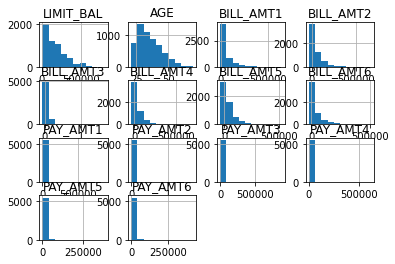

In [11]:
#outlier(df,num, p = 0.1)
df[num].hist()

In [12]:
len(df) / dim_antes

0.9975111111111111

## Ingeniería de variables

### Numéricas

In [13]:
## Promedio de todos los montos de pago
df['Prom_monto'] = df[monto].mean(axis = 1)
num += ['Prom_monto']
df['Prom_monto'].describe()

count      5611.000000
mean      44991.985861
std       64015.270061
min       -7081.166667
25%        4789.333333
50%       20037.666667
75%       56855.666667
max      566486.166667
Name: Prom_monto, dtype: float64

In [14]:
pago = [x for x in pago if x not in ['PAY_AMT1']]
pago

['PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [15]:
## Promedio de todos los pagos de pago
df['Prom_pago'] = df[pago].mean(axis = 1)
num += ['Prom_pago']
df['Prom_pago'].describe()

count      5611.000000
mean       5306.313598
std       13234.559117
min           0.000000
25%        1000.000000
50%        2267.000000
75%        5271.300000
max      578102.800000
Name: Prom_pago, dtype: float64

In [16]:
## Diferencia entre monto y pago 
## PAGO N ES DEL MONTO N+1 (anterior porque 1=sep, 2=ago, ..., 6=abril)
dif = []
for i in range(2,6):
    df[f'dif_{i}'] =  df[f'BILL_AMT{i+1}'] - df[f'PAY_AMT{i}']
    dif += [f'dif_{i}']

num += dif
df[dif].describe()

,dif_2,dif_3,dif_4,dif_5
count,5.611000e+03,5611.000000,5611.000000,5611.000000
mean,4.087079e+04,38022.374978,35610.242203,34368.538585
std,6.791519e+04,62887.985513,59018.000152,57028.736976
min,-1.181069e+06,-683112.000000,-355569.000000,-230000.000000
25%,0.000000e+00,0.000000,0.000000,0.000000
50%,1.553600e+04,14373.000000,12581.000000,11204.000000
75%,5.197000e+04,48048.000000,45635.000000,44547.500000
max,6.591270e+05,676864.000000,516672.000000,491849.000000


<AxesSubplot:>

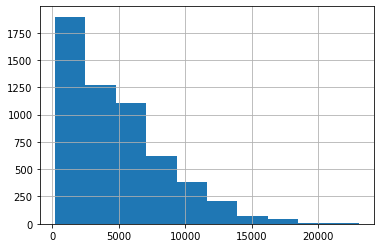

In [17]:
df['Limit_edad'] = df['LIMIT_BAL'] / df['AGE']
df['Limit_edad'].hist()

In [18]:
## Variables "unitarias", entre el límite de crédito por edad
lim = []
for x in num[-6:]:
    df[f'{x}/lim'] = df[x] / df['Limit_edad']
    lim += [f'{x}/lim']
    
num += lim + ['Limit_edad']
df[lim].describe()

,Prom_monto/lim,Prom_pago/lim,dif_2/lim,dif_3/lim,dif_4/lim,dif_5/lim
count,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000
mean,12.963465,1.300839,12.046981,11.202618,10.296738,9.958629
std,13.420085,1.998022,14.335707,13.501800,12.602086,12.496958
min,-6.743250,0.000000,-145.896759,-84.384424,-43.923229,-26.122500
25%,1.078584,0.338327,0.000000,0.000000,0.000000,0.000000
50%,9.058400,0.815232,6.805800,5.916167,5.167435,4.438800
75%,21.967733,1.470960,21.601607,20.248854,18.477998,17.984190
max,171.657867,71.412699,166.684800,159.707200,152.520000,119.697600


In [19]:
## Dimensión hasta ahora
df.shape

(5611, 35)

In [20]:
num

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Prom_monto',
 'Prom_pago',
 'dif_2',
 'dif_3',
 'dif_4',
 'dif_5',
 'Prom_monto/lim',
 'Prom_pago/lim',
 'dif_2/lim',
 'dif_3/lim',
 'dif_4/lim',
 'dif_5/lim',
 'Limit_edad']

### Categóricas

In [21]:
for col in estatus:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(df[col][i])
    df[col] = aux

for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_2
1,-1,0.201212
3,-2,0.129032
0,0,0.525575
2,>=1,0.144181


,index,PAY_3
1,-1,0.199608
2,-2,0.138478
0,0,0.526466
3,>=1,0.135448


,index,PAY_4
1,-1,0.192479
2,-2,0.144003
0,0,0.549635
3,>=1,0.113883


,index,PAY_5
1,-1,0.184281
2,-2,0.151666
0,0,0.570843
3,>=1,0.093210


,index,PAY_6
1,-1,0.192657
2,-2,0.165389
0,0,0.541436
3,>=1,0.100517


In [22]:
for col in cat[:3]:
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5611 non-null   object
 1   EDUCATION  5611 non-null   object
 2   MARRIAGE   5611 non-null   object
 3   PAY_2      5611 non-null   object
 4   PAY_3      5611 non-null   object
 5   PAY_4      5611 non-null   object
 6   PAY_5      5611 non-null   object
 7   PAY_6      5611 non-null   object
dtypes: object(8)
memory usage: 350.8+ KB


In [23]:
[x for x in df.columns if x not in cat + num]

[]

In [24]:
## Se define la variable objetivo
tgt = ['PAY_AMT1']
num = [x for x in num if x not in tgt]
[x for x in df.columns if x not in cat + num]

['PAY_AMT1']

In [25]:
for col in cat[:3]:
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5611 non-null   object
 1   EDUCATION  5611 non-null   object
 2   MARRIAGE   5611 non-null   object
 3   PAY_2      5611 non-null   object
 4   PAY_3      5611 non-null   object
 5   PAY_4      5611 non-null   object
 6   PAY_5      5611 non-null   object
 7   PAY_6      5611 non-null   object
dtypes: object(8)
memory usage: 350.8+ KB


## Modelaje

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>]], dtype=object)

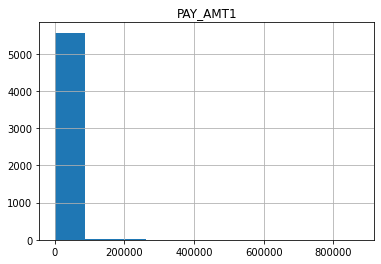

In [26]:
X = pd.get_dummies(df[cat]).join(df[num])
y = df[tgt]
y.hist()

In [27]:
X.shape

(5611, 56)

### Reducción de dimensiones

In [28]:
# Se eligirán las mejores variables
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(k = 22, score_func = f_regression)
kb.fit(X, y)

ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
X[ls_best].describe()

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
count,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5.611000e+03,5611.000000,5611.000000,5611.000000,5.611000e+03,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.000000
mean,0.010515,0.201212,0.144181,168267.274996,50955.970950,48833.271788,4.708557e+04,43484.093566,40470.895028,39122.109071,6.214786e+03,5461.718588,4860.652825,4753.570487,5240.840492,44991.985861,5306.313598,38022.374978,35610.242203,34368.538585,1.300839,4854.952742
std,0.102012,0.400942,0.351305,129594.195142,74118.361793,71516.149018,7.274819e+04,65296.075779,61539.556281,59692.482884,3.297545e+04,20014.029275,16604.561728,14768.363311,17374.394953,64015.270061,13234.559117,62887.985513,59018.000152,57028.736976,1.998022,3702.627172
min,0.000000,0.000000,0.000000,10000.000000,-9095.000000,-30000.000000,-6.150600e+04,-34503.000000,-37594.000000,-21295.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-7081.166667,0.000000,-683112.000000,-355569.000000,-230000.000000,0.000000,181.818182
25%,0.000000,0.000000,0.000000,50000.000000,3594.000000,2894.000000,2.631500e+03,2404.000000,1792.000000,1394.500000,9.870000e+02,390.000000,316.000000,269.000000,95.500000,4789.333333,1000.000000,0.000000,0.000000,0.000000,0.338327,1862.435948
50%,0.000000,0.000000,0.000000,140000.000000,21763.000000,20394.000000,1.937400e+04,18753.000000,17510.000000,16739.000000,2.007000e+03,1800.000000,1500.000000,1509.000000,1500.000000,20037.666667,2267.000000,14373.000000,12581.000000,11204.000000,0.815232,4090.909091
75%,0.000000,0.000000,0.000000,240000.000000,66740.000000,64090.500000,5.964200e+04,54078.500000,50362.000000,49432.500000,5.000000e+03,4847.000000,4112.000000,4100.000000,4000.000000,56855.666667,5271.300000,48048.000000,45635.000000,44547.500000,1.470960,6896.551724
max,1.000000,1.000000,1.000000,800000.000000,653062.000000,671563.000000,1.664089e+06,706864.000000,530672.000000,511905.000000,1.684259e+06,889043.000000,621000.000000,379267.000000,422000.000000,566486.166667,578102.800000,676864.000000,516672.000000,491849.000000,71.412699,23103.448276


<AxesSubplot:>

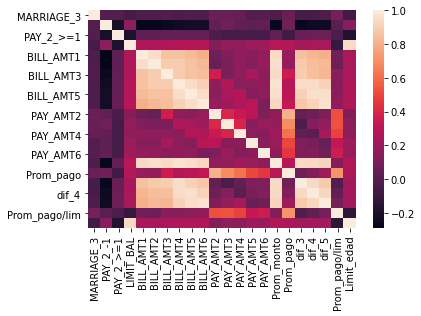

In [29]:
import seaborn as sns
sns.heatmap(X[ls_best].corr())

In [30]:
## Y modificamos la matriz X con las mejores variables
X = X[ls_best].copy()

### Escalamiento

In [31]:
## Se separan los conjuntos de entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 777)
len(y_test) / len(y_train)

0.250222816399287

In [32]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

## En train se ajusta y transforma
X = pd.DataFrame(mm_x.fit_transform(X_train),
                 columns = X.columns)
y = mm_y.fit_transform(y_train)

## Y en test sólo se transforma
X_test_mm = pd.DataFrame(mm_x.transform(X_test),
                         columns = X.columns)
y_test_mm = mm_y.transform(y_test)

X.describe()

,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
count,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000
mean,0.010472,0.201426,0.144162,0.201524,0.090883,0.112561,0.062989,0.105565,0.137518,0.113997,0.003689,0.006478,0.007739,0.012774,0.012367,0.091104,0.009286,0.530239,0.448633,0.366618,0.018138,0.217360
std,0.101809,0.401110,0.351293,0.165500,0.110855,0.100915,0.042337,0.088202,0.108228,0.112290,0.020899,0.024615,0.027883,0.040421,0.040167,0.111067,0.024540,0.046297,0.067555,0.079196,0.028376,0.171745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.050633,0.019180,0.046857,0.037137,0.049710,0.069251,0.042643,0.000594,0.000439,0.000497,0.000791,0.000191,0.020696,0.001736,0.502297,0.407650,0.318626,0.004641,0.077869
50%,0.000000,0.000000,0.000000,0.164557,0.047267,0.072403,0.046944,0.072076,0.097446,0.072342,0.001194,0.002063,0.002415,0.004045,0.003555,0.048507,0.003909,0.512868,0.422579,0.334728,0.011394,0.182575
75%,0.000000,0.000000,0.000000,0.291139,0.114171,0.134307,0.070235,0.120419,0.154807,0.133163,0.002969,0.005573,0.006531,0.010814,0.009479,0.111796,0.009078,0.537712,0.460628,0.380977,0.020651,0.312713
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Entrenamiento

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(X, y)
ridge_res = cross_val_score(estimator = ridge,
                         X = X,
                         y = y,
                         cv = 3,
                         n_jobs = -1,
                         scoring = "r2")

np.mean(ridge_res), np.std(ridge_res)

(0.1987282999242056, 0.06990867924667371)

### Hiper-parametrización

In [34]:
from sklearn.linear_model import ElasticNet

## Se crea un DF para almacenar scores con diferentes parámetros
df_res = pd.DataFrame(columns=["alpha", "l1_ratio", "score", "std"])
contador = 0
for i in range(0, 100, 10):
    for j in range(10):
        elasnet_h = ElasticNet(alpha=i, l1_ratio=j/10)
        elasnet_h.fit(X, y)
        ls_res = cross_val_score(estimator = elasnet_h, 
                                 X = X, 
                                 y = y, 
                                 cv = 3, 
                                 n_jobs = -1,
                                 scoring = "r2")
        df_res.loc[contador, "alpha"] = i
        df_res.loc[contador, "l1_ratio"] = j
        df_res.loc[contador, "score"] = np.mean(ls_res)
        df_res.loc[contador, "std"] = np.std(ls_res)
        contador += 1

## Se ordena dicho DF
df_res = df_res.sort_values(by = 'score',
                            ascending = False).copy().head(5)

## Se guardan los parámetros del mejor score
alphas = df_res.iloc[0,0]
l1_ratios = df_res.iloc[0,1]

<ipython-input-34-6d628a40b7e8>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6010282327838806, tolerance: 0.0002576515087371638
  model = cd_fast.enet_coordinate_descent(
<ipython-input-34-6d628a40b7e8>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/si

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.287922522767153, tolerance: 0.0002576515087371638
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2880060662669257, tolerance: 0.0002576515087371638
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2880562599439584, tolerance: 0.0002576515087371638
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplom

In [35]:
## Y se ejecuta
elasnet_h = ElasticNet(alpha = alphas,
                     l1_ratio = l1_ratios)
elasnet_h.fit(X, y)
el_h_res = cross_val_score(estimator = elasnet_h,
                           X = X,
                           y = y,
                           cv = 3,
                           n_jobs = -1,
                           scoring = "r2")

np.mean(el_h_res), np.std(el_h_res)

<ipython-input-35-7404d29844e2>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6010282327838806, tolerance: 0.0002576515087371638
  model = cd_fast.enet_coordinate_descent(


(0.26476885033598463, 0.17719401987878375)

### Prueba

In [36]:
pd.DataFrame(X).describe()

,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
count,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000
mean,0.010472,0.201426,0.144162,0.201524,0.090883,0.112561,0.062989,0.105565,0.137518,0.113997,0.003689,0.006478,0.007739,0.012774,0.012367,0.091104,0.009286,0.530239,0.448633,0.366618,0.018138,0.217360
std,0.101809,0.401110,0.351293,0.165500,0.110855,0.100915,0.042337,0.088202,0.108228,0.112290,0.020899,0.024615,0.027883,0.040421,0.040167,0.111067,0.024540,0.046297,0.067555,0.079196,0.028376,0.171745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.050633,0.019180,0.046857,0.037137,0.049710,0.069251,0.042643,0.000594,0.000439,0.000497,0.000791,0.000191,0.020696,0.001736,0.502297,0.407650,0.318626,0.004641,0.077869
50%,0.000000,0.000000,0.000000,0.164557,0.047267,0.072403,0.046944,0.072076,0.097446,0.072342,0.001194,0.002063,0.002415,0.004045,0.003555,0.048507,0.003909,0.512868,0.422579,0.334728,0.011394,0.182575
75%,0.000000,0.000000,0.000000,0.291139,0.114171,0.134307,0.070235,0.120419,0.154807,0.133163,0.002969,0.005573,0.006531,0.010814,0.009479,0.111796,0.009078,0.537712,0.460628,0.380977,0.020651,0.312713
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
X_test_mm.describe()

,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,0.010686,0.200356,0.144256,0.195599,0.089918,0.111597,0.062695,0.103710,0.136798,0.110568,0.003693,0.004808,0.008178,0.011571,0.012626,0.089525,0.008749,0.530320,0.447851,0.364718,0.018527,0.214448
std,0.102864,0.400445,0.351506,0.158069,0.116198,0.105972,0.041453,0.087590,0.108601,0.110595,0.013033,0.010425,0.021574,0.032342,0.044983,0.113791,0.014557,0.046043,0.068115,0.078246,0.026342,0.171862
min,0.000000,0.000000,0.000000,0.000000,0.010715,0.040099,0.034113,0.040161,0.047670,0.012869,0.000000,0.000000,0.000000,0.000000,0.000000,0.011614,0.000000,0.488463,0.379757,0.261487,0.000000,0.000318
25%,0.000000,0.000000,0.000000,0.063291,0.019004,0.047233,0.037249,0.049963,0.069715,0.042342,0.000568,0.000426,0.000525,0.000279,0.000421,0.020705,0.001647,0.502297,0.407650,0.318626,0.005139,0.078935
50%,0.000000,0.000000,0.000000,0.164557,0.044508,0.069908,0.046580,0.070937,0.095776,0.068425,0.001187,0.001889,0.002415,0.003955,0.003555,0.045807,0.003988,0.512836,0.421290,0.331743,0.011541,0.179625
75%,0.000000,0.000000,0.000000,0.278481,0.115142,0.132677,0.069401,0.117312,0.154570,0.127950,0.002980,0.005006,0.007202,0.010694,0.009479,0.107871,0.009394,0.537176,0.457742,0.376277,0.020029,0.300819
max,1.000000,1.000000,1.000000,0.835443,0.960109,0.906466,0.353022,0.727004,0.880281,0.841168,0.230443,0.112534,0.271271,0.546950,0.729858,0.927333,0.150079,0.860782,0.920130,0.880589,0.354874,1.063288


In [38]:
## Y se corre para el conjunto de prueba
from sklearn.metrics import r2_score
'{:,.2%}'.format(r2_score(y_pred = elasnet_h.predict(X_test_mm),
                          y_true = y_test_mm))

'36.48%'

In [39]:
## Se despliega la relación que tiene cada una de las mejores variables que explican
# la variable objetivo
pd.DataFrame(list(zip(ls_best, elasnet_h.coef_)),
            columns = ['Variable', 'Explica']).sort_values(by = 'Explica')

,Variable,Explica
6,BILL_AMT3,-0.503044
4,BILL_AMT1,-0.209500
15,Prom_monto,-0.058488
13,PAY_AMT5,-0.030216
18,dif_4,-0.012436
21,Limit_edad,-0.005095
8,BILL_AMT5,-0.001489
2,PAY_2_>=1,-0.001248
0,MARRIAGE_3,0.003954
1,PAY_2_-1,0.005315


In [41]:
import pickle

## Guardar modelo
with open('PAY_1.pkl', 'wb') as file:
    pickle.dump(elasnet_h, file)

## Abrir un modelo
with open('PAY_1.pkl', 'rb') as file:
    pay_1 = pickle.load(file)

## Listo para usarse
pay_1

ElasticNet(alpha=0, l1_ratio=0)

In [42]:
'{:,.2%}'.format(r2_score(y_pred = pay_1.predict(X_test_mm),
                          y_true = y_test_mm))

'36.48%'

## Validación

In [40]:
val = pd.read_csv(liga + 'val_PAY_AMT1.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
val.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
961,23160,50000.0,2,2,1,41,3,2,0,0,0,21638.0,21008.0,20388.0,21092.0,21511.0,21964.0,0.0,1350.0,769.0,799.0,1000.0
621,23884,200000.0,1,3,2,34,2,2,3,2,2,138839.0,142121.0,193777.0,189225.0,192304.0,188695.0,56100.0,5.0,7269.0,28.0,5828.0
464,16865,100000.0,2,1,2,38,2,2,2,2,2,37566.0,37160.0,39750.0,40298.0,40835.0,41529.0,3500.0,1500.0,1500.0,1500.0,2000.0
1171,7334,20000.0,1,1,2,25,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,1000.0,0.0


In [41]:
cat = list(val.columns[2:11])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_2      1875 non-null   object
 4   PAY_3      1875 non-null   object
 5   PAY_4      1875 non-null   object
 6   PAY_5      1875 non-null   object
 7   PAY_6      1875 non-null   object
dtypes: object(8)
memory usage: 117.3+ KB


In [42]:
## Ya no existe PAY_AMT1 porque será la variable a estimar
num = [col for col in val.columns if col not in cat + ['CUSTOMER_ID']]
val[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  1875 non-null   float64
 1   AGE        1875 non-null   int64  
 2   BILL_AMT1  1875 non-null   float64
 3   BILL_AMT2  1875 non-null   float64
 4   BILL_AMT3  1875 non-null   float64
 5   BILL_AMT4  1875 non-null   float64
 6   BILL_AMT5  1875 non-null   float64
 7   BILL_AMT6  1875 non-null   float64
 8   PAY_AMT2   1875 non-null   float64
 9   PAY_AMT3   1875 non-null   float64
 10  PAY_AMT4   1875 non-null   float64
 11  PAY_AMT5   1875 non-null   float64
 12  PAY_AMT6   1875 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 190.6 KB


In [43]:
## Ya existen los conjuntos, pero no está de más redefinirlos
pay = [col for col in val.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in val.columns if col.startswith('BILL')]

In [44]:
## Qué columnas necesita el modelo?
pd.DataFrame(X).sample()

,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
3032,0.0,0.0,1.0,0.012658,0.043994,0.070303,0.045854,0.060956,0.086122,0.039938,0.001187,0.004499,0.003274,0.0,0.0,0.035305,0.002779,0.507215,0.418327,0.318626,0.026997,0.030222


Monto prom

Agrupar PAY>=1

Dummies para las categóricas

Filtrar las mejores columnas

Escalamiento

### Ingeniería de variables

In [45]:
## Promedio de todos los montos de pago
val['Prom_monto'] = val[monto].mean(axis = 1)
num += ['Prom_monto']

## Promedio de todos los pagos de pago
val['Prom_pago'] = val[pago].mean(axis = 1)
num += ['Prom_pago']

## Diferencia entre monto y pago 
## PAGO N ES DEL MONTO N+1 (anterior porque 1=sep, 2=ago, ..., 6=abril)
dif = []
for i in range(2,6):
    val[f'dif_{i}'] =  val[f'BILL_AMT{i+1}'] - val[f'PAY_AMT{i}']
    dif += [f'dif_{i}']
num += dif

val['Limit_edad'] = val['LIMIT_BAL'] / val['AGE']

## Variables "unitarias", entre el límite de crédito por edad
lim = []
for x in num[-6:]:
    val[f'{x}/lim'] = val[x] / val['Limit_edad']
    lim += [f'{x}/lim']    
num += lim + ['Limit_edad']

val[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       1875 non-null   float64
 1   AGE             1875 non-null   int64  
 2   BILL_AMT1       1875 non-null   float64
 3   BILL_AMT2       1875 non-null   float64
 4   BILL_AMT3       1875 non-null   float64
 5   BILL_AMT4       1875 non-null   float64
 6   BILL_AMT5       1875 non-null   float64
 7   BILL_AMT6       1875 non-null   float64
 8   PAY_AMT2        1875 non-null   float64
 9   PAY_AMT3        1875 non-null   float64
 10  PAY_AMT4        1875 non-null   float64
 11  PAY_AMT5        1875 non-null   float64
 12  PAY_AMT6        1875 non-null   float64
 13  Prom_monto      1875 non-null   float64
 14  Prom_pago       1875 non-null   float64
 15  dif_2           1875 non-null   float64
 16  dif_3           1875 non-null   float64
 17  dif_4           1875 non-null   f

In [46]:
for col in estatus:
    aux = []
    for i in range(len(val)):
        if int(val[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(val[col][i])
    val[col] = aux
    
for col in cat[:3]:
    val[col] = val[col].astype(int)
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_2      1875 non-null   object
 4   PAY_3      1875 non-null   object
 5   PAY_4      1875 non-null   object
 6   PAY_5      1875 non-null   object
 7   PAY_6      1875 non-null   object
dtypes: object(8)
memory usage: 117.3+ KB


### Reducción de dimensiones

In [47]:
modelo = pd.get_dummies(val[cat]).join(val[num])[ls_best]
modelo.describe()

,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.009067,0.211733,0.153600,167360.000000,51257.246933,48564.95200,45852.744533,42731.132267,40418.536533,38012.933333,5999.858133,5747.890133,5030.21600,4253.560000,5660.153067,44472.924267,5338.335467,36983.242133,35388.320533,33759.373333,1.341640,4823.938385
std,0.094812,0.408646,0.360661,128625.920928,76539.074734,73111.61181,70117.809952,64500.616218,62158.250263,59224.776891,18846.682706,18257.177701,16634.93738,11233.379263,21803.812308,64224.232116,9805.204498,61702.612671,58722.522571,56837.707946,2.028934,3728.964203
min,0.000000,0.000000,0.000000,10000.000000,-2225.000000,-26214.00000,-157264.000000,-3300.000000,-19205.000000,-11049.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1580.000000,0.000000,-165840.000000,-100390.000000,-100000.000000,0.000000,172.413793
25%,0.000000,0.000000,0.000000,50000.000000,2797.500000,2500.00000,2305.000000,1765.000000,1399.500000,846.500000,629.000000,390.000000,166.50000,3.500000,28.500000,3844.583333,932.500000,0.000000,0.000000,0.000000,0.310410,1777.777778
50%,0.000000,0.000000,0.000000,140000.000000,19891.000000,19639.00000,19057.000000,18391.000000,17154.000000,14974.000000,2002.000000,1612.000000,1473.00000,1367.000000,1495.000000,19475.500000,2097.000000,13343.000000,11660.000000,9800.000000,0.783640,4000.000000
75%,0.000000,0.000000,0.000000,240000.000000,63749.500000,60270.50000,56590.000000,50783.000000,49495.500000,47577.000000,5000.000000,4558.500000,4000.00000,3712.500000,4000.000000,54753.083333,5400.000000,46161.000000,44923.500000,43807.500000,1.410095,6881.944444
max,1.000000,1.000000,1.000000,610000.000000,608594.000000,624475.00000,632041.000000,516575.000000,454845.000000,456596.000000,344261.000000,332809.000000,256662.00000,133841.000000,443001.000000,548854.333333,103771.200000,499354.000000,439545.000000,440596.000000,23.349430,18518.518519


### Escalamiento

In [48]:
modelo = pd.DataFrame(mm_x.transform(modelo), columns = modelo.columns)
modelo.describe()

,MARRIAGE_3,PAY_2_-1,PAY_2_>=1,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto,Prom_pago,dif_3,dif_4,dif_5,Prom_pago/lim,Limit_edad
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.009067,0.211733,0.153600,0.199190,0.091145,0.111986,0.062215,0.104178,0.137282,0.111230,0.003562,0.006465,0.008100,0.011215,0.013413,0.089883,0.009234,0.529491,0.448222,0.365394,0.018787,0.215339
std,0.094812,0.408646,0.360661,0.162818,0.115591,0.104212,0.040634,0.087002,0.109382,0.111074,0.011190,0.020536,0.026787,0.029619,0.051668,0.111973,0.016961,0.045370,0.067324,0.078739,0.028411,0.172979
min,0.000000,0.000000,0.000000,0.000000,0.010375,0.005397,-0.055493,0.042088,0.032360,0.019216,0.000000,0.000000,0.000000,0.000000,0.000000,0.009591,0.000000,0.380354,0.292556,0.180093,0.000000,-0.000436
25%,0.000000,0.000000,0.000000,0.050633,0.017960,0.046325,0.036979,0.048920,0.068618,0.041526,0.000373,0.000439,0.000268,0.000009,0.000068,0.019049,0.001613,0.502297,0.407650,0.318626,0.004347,0.074033
50%,0.000000,0.000000,0.000000,0.164557,0.043775,0.070755,0.046687,0.071347,0.096342,0.068021,0.001189,0.001813,0.002372,0.003604,0.003543,0.046301,0.003627,0.512108,0.421018,0.332202,0.010973,0.177118
75%,0.000000,0.000000,0.000000,0.291139,0.110011,0.128671,0.068438,0.115039,0.153255,0.129167,0.002969,0.005127,0.006441,0.009789,0.009479,0.107806,0.009341,0.536240,0.459153,0.379314,0.019746,0.310805
max,1.000000,1.000000,1.000000,0.759494,0.932844,0.932881,0.401918,0.743327,0.866564,0.896270,0.204399,0.374345,0.413304,0.352894,1.049765,0.969259,0.179503,0.869476,0.911576,0.928998,0.326965,0.850602


### Predicción

In [49]:
resultado = pd.DataFrame(elasnet_h.predict(modelo))
resultado = pd.DataFrame(mm_y.inverse_transform(resultado),
                         columns = ['y_hat'])
resultado = pd.DataFrame(val['CUSTOMER_ID']).join(resultado)
resultado['y_hat'].describe()

count      1875.000000
mean       5983.474263
std       14151.965361
min     -106628.682024
25%         824.212860
50%        3581.205873
75%        7455.836655
max      209669.885827
Name: y_hat, dtype: float64

In [50]:
df['PAY_AMT1'].describe() , pd.DataFrame(y_test).describe()

(count      5611.000000
 mean       5699.859918
 std       19628.754505
 min           0.000000
 25%        1000.000000
 50%        2100.000000
 75%        5003.500000
 max      873552.000000
 Name: PAY_AMT1, dtype: float64,
             PAY_AMT1
 count    1123.000000
 mean     5011.809439
 std     13172.384753
 min         0.000000
 25%      1000.000000
 50%      2017.000000
 75%      5000.000000
 max    298887.000000)

In [51]:
resultado['y_hat'].describe() , pd.DataFrame(mm_y.inverse_transform(ridge.predict(X_test_mm))).describe()

(count      1875.000000
 mean       5983.474263
 std       14151.965361
 min     -106628.682024
 25%         824.212860
 50%        3581.205873
 75%        7455.836655
 max      209669.885827
 Name: y_hat, dtype: float64,
                    0
 count    1123.000000
 mean     5591.768586
 std      8501.720587
 min    -26354.591662
 25%       773.852924
 50%      3829.183536
 75%      7918.181428
 max    113025.379083)

In [52]:
## Hay predicciones negativas, se omiten
aux = []
for x in resultado['y_hat']:
    if x < 0:
        aux.append(0)
    else:
        aux.append(x)

resultado['y_hat'] = aux
resultado['y_hat'].describe()

count      1875.000000
mean       6802.589993
std       12662.266932
min           0.000000
25%         824.212860
50%        3581.205873
75%        7455.836655
max      209669.885827
Name: y_hat, dtype: float64

In [53]:
resultado.to_csv(liga + 'FloresHernandezEfrainIsmael_PAYAMT1_v2.csv',
                 index = False)